---

<center>

# **12 Steps to Navier-Stokes**

<center>

---


The final goal of this series of Jupyter Notebook (based on Lorena Barba's **12 steps to Navier-Stokes** course) is to program a **Navier-Stokes solver**.

We'll start by solving 1D problems and then scale to 2D to end up solving the Navier-Stokes equation for specific cases like **cavity and channel flo**w.

In this first step we will take care of the **1D linear convection equation**

## Step 1: 1D Linear Convection

---

The 1D linear convection equation describes how a quantity travels through one dimensional space at constant speed, $\text{c}$.

$$\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0$$

In our context the quantity will be a wave, moving through space with speed $\text{c}$ without changing shape. Let the initial condition be $u(x,0)=u_0(x)$. Then the exact solution of the equation is $u(x,t)=u_0(x-ct)$.

To numerically solve this PDE firs it must be discretized using the **Finite Difference** method, it consists of approximating derivatives in a PDE by using differences between values at discrete points on a grid. The time is discretized using the forward difference and space by backward difference.

Consider discretizing the spatial coordinate $x$ into points that we index from $i=0$ to $N$, and stepping in discrete time intervals of size $\Delta t$.

We know that

$$\frac{\partial u}{\partial x}\approx \frac{u(x+\Delta x)-u(x)}{\Delta x}$$

so the 1D linear convection equationd, discretized

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + c \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0 $$

Where $n$ and $n+1$ are two consecutive steps in time, while $i-1$ and $i$ are two neighboring points of the discretized $x$ coordinate. If there are given initial conditions, then the only unknown in this discretization is $u_i^{n+1}$.  We can solve for our unknown to get an equation that allows us to advance in time, as follows:

$$u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)$$

Now implement it with Python.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import time, sys
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

In [22]:
grid_points = 151                              # Number of grid points
grid_length = 5                                # Lenght of the grid
dx = grid_length / (grid_points - 1)           # Distance between adjacent grid points
time_steps = 150                               # Number of time steps
dt = 0.025                                     # Size of time steps
c = 1                                          # Assume wavespeed of c = 1

We also need to set up our initial conditions. The initial velocity $u_0$ is given as 
$u = 2$ in the interval $0.5 \leq x \leq 1$  and $u = 1$ everywhere else in $(0,2)$ (i.e., a hat function).

(0.0, 5.0)

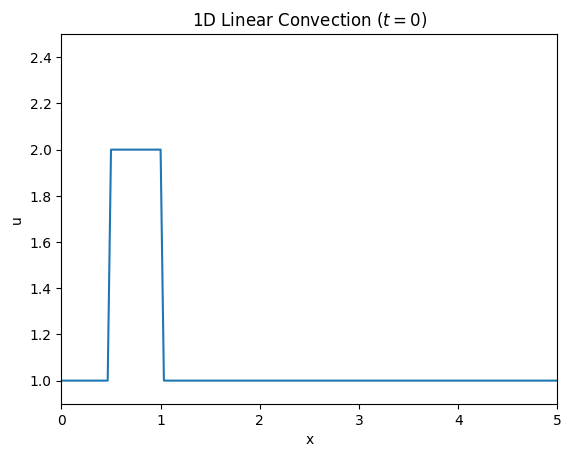

In [24]:
u = np.ones(grid_points)
u[int(0.5 / dx) : int((1 / dx) + 1)] = 2

x = np.linspace(0, grid_length, grid_points)


fig, ax = plt.subplots()
ax.plot(x, u)
ax.set_title(r'1D Linear Convection ($t=0$)')
ax.set_xlabel("x")
ax.set_ylabel("u")
ax.set_ylim(0.9, 2.5)
ax.set_xlim(0, grid_length)

Now it's time to implement the discretization of the convection equation using the FDM. That is, for every element inside the array `u`, we need to perform the previously derived operation $u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)$.

We'll store the the result in a new array called `u_n` wich will be the value of $u$ for the next time-step.  We will repeat this operation for as many time-steps as we specify and then we can see how far the wave has convected.

Then, we may think we have two iterative operations: one in space and one in time (we'll learn differently later), so we'll start by nesting one loop inside the other.

(0.0, 5.0)

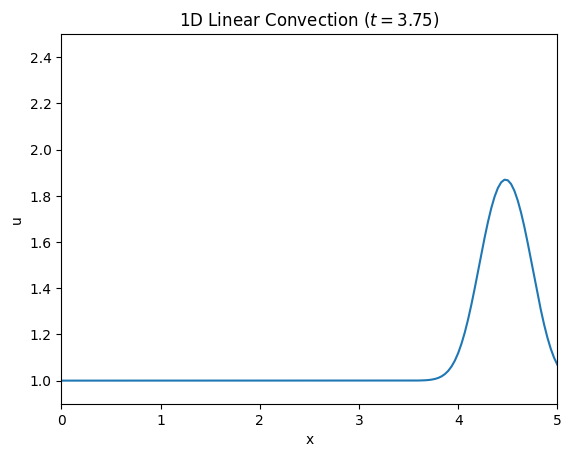

In [25]:
u_n = np.ones(grid_points)

for n in range(time_steps):
    u_n = u.copy()
    for i in range(1, grid_points):
        u[i] = u_n[i] - c * (dt / dx) * (u_n[i] - u_n[i-1])

fig, ax1 = plt.subplots()
ax1.plot(x, u_n)
ax1.set_title(r'1D Linear Convection ($t=3.75$)')
ax1.set_xlabel("x")
ax1.set_ylabel("u")
ax1.set_ylim(0.9, 2.5)
ax1.set_xlim(0, grid_length)

It's weird looking at an image 2.5 seconds later and noticing that the square wave turned into a sort of a bell and decreased amplitude, let's create an animation through time to better understand what's happening

In [26]:
plt.ioff()

fig, ax2 = plt.subplots()
fig.set_size_inches(6, 5)
ax2.set_title(r'1D Linear Convection (from $t=0$ to $t=3.75$)', fontsize = 12)
ax2.set_xlabel("x", fontsize=12)
ax2.set_ylabel("u", fontsize=12)
ax2.set_ylim(0.9, 2.5)
ax2.set_xlim(0, grid_length)
ax2.grid(True, linestyle='--', alpha=0.3)

line, = ax2.plot([], [], color='#008080', lw=2)

u = np.ones(grid_points)
u[int(0.5 / dx) : int((1 / dx) + 1)] = 2

def init():
    line.set_data([], [])
    return line,

def update_anim(j):
    u_n = u.copy()
    for i in range(1, grid_points):
        u[i] = u_n[i] - c * (dt / dx) * (u_n[i] - u_n[i-1])
    line.set_data(x, u)
    return line,

anim = animation.FuncAnimation(
                fig = fig,
                func = update_anim,
                init_func = init,
                frames = time_steps,
                interval = 50,
                blit = True
)

anim.save('1D_linear_convection.mp4', writer=animation.FFMpegWriter(fps=30))

plt.ion()